In [ ]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=2f4689e4e2044e8bf5e840ff7ce13afff26a49d0d33ced3df7aad46e796dd990
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import os
import networkx as nx
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import random
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ucla_v2 = '/content/drive/MyDrive/SUPPLEMENTARY CODE/Data/Preprocessed Data/UCLA Weighted v2'
ucla_v2_aug = '/content/drive/MyDrive/SUPPLEMENTARY CODE/Data/Preprocessed Data/UCLA Aug Weighted'

### Method 1: Random Sampling

In [ ]:
for sample in os.listdir(ucla_weighted):
    if '(' in sample:
        continue
    if(sample.endswith('.csv')): 
        file=ucla_weighted+ '/' +sample
        data=pd.read_csv(file, header=None)
        data= data.fillna(0)
        df= data.to_numpy()
        for i in range(swaps):
            i=randint(0,163)
            j=randint(0,163)
            val=np.median(df[i])
            df[i][j]=val
            df[j][i]= val

        df1= pd.DataFrame(df, columns=data.columns)
        dest_file = 'ucla_weighted_'+ str(subject) +'.csv'
        try:
            df1.to_csv( dest_dir+dest_file, index=False, header=False, encoding = 'utf-8')   
        except Exception as e:
            print(e)
        subject+=1

### Distributed Sampling

In [ ]:
def augment(np_v2_2, col, row):
  indx = random.sample(range(0, col), 7)
  indy = random.sample(range(0, row), 7)
  for i in range(len(indx)):
    s = random.sample(range(0, 1), 1)
    r = random.uniform(0,0.3)
    if s==0:
      np_v2_2[indx[i]][indy[i]] = r + np_v2_2[indx[i]][indy[i]]
      np_v2_2[indy[i]] [indx[i]] = r + np_v2_2[indy[i]][indx[i]]
    else:
      np_v2_2[indx[i]][indy[i]] = r - np_v2_2[indx[i]][indy[i]]
      np_v2_2[indy[i]] [indx[i]] = r - np_v2_2[indy[i]][indx[i]]
  return np_v2_2

In [ ]:
for f in os.listdir(ucla_v2):
  if '(' in f:
    continue
  if not f.endswith('csv'):
    continue
  ucla_v2_sub = os.path.join(ucla_v2, f)
  #print(ucla_v2_sub)
  df_v2_sub = pd.read_csv(ucla_v2_sub, header=None)
  col = len(df_v2_sub)
  row = len(df_v2_sub[0])
  df_v2_aug = augment(df_v2_sub, col, row)
  h = f.rfind('_')
  p = f.find('.')
  sub_name = int(f[h+1:p])+1000
  file_name = 'ucla_weighted'+'_'+str(sub_name)+'.csv'
  dest = os.path.join(ucla_v2_aug, file_name)
  try:
    df_v2_aug.to_csv(dest, index=False, header=False, encoding = 'utf-8')   
  except:
    print("ERROR: Create a folder having this path:",dest)  
    break

# Extra Trial

In [ ]:
ucla_v2_2001 ='/content/drive/MyDrive/SUPPLEMENTARY CODE/Data/Preprocessed Data/UCLA Weighted v2/ucla_weighted_2001.csv'

df_v2 = pd.read_csv(ucla_v2_2001, header=None)
df_v2.head()

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,NaN,0.408635,0.091122,0.141027,0.212356,0.232217,0.153159,0.101704,0.422963,0.128853,...,-0.025669,-0.193461,-0.301842,0.016608,0.125022,0.127793,-0.009022,0.032929,-0.287735,-0.032206
1,0.408635,NaN,0.437967,0.452820,-0.194418,-0.061455,0.120086,-0.040434,0.113105,-0.100684,...,0.074928,0.391174,-0.152202,0.013005,0.098310,-0.119852,0.071226,-0.041300,0.020607,0.334697
2,0.091122,0.437967,NaN,0.149192,-0.210396,-0.088659,-0.010411,-0.142276,0.162457,0.029971,...,0.170891,0.203254,-0.453497,-0.228100,-0.106776,-0.055199,0.002006,-0.092069,0.141708,0.123455
3,0.141027,0.452820,0.149192,NaN,-0.279202,-0.365347,0.139110,-0.151724,-0.135375,-0.234444,...,0.220136,0.406015,-0.007174,0.287492,0.414779,-0.405352,-0.256749,-0.123936,0.341234,0.212942
4,0.212356,-0.194418,-0.210396,-0.279202,NaN,1.230418,0.292630,0.114947,-0.027004,0.126552,...,-0.102763,-0.168673,-0.215468,-0.067362,0.078732,0.172673,-0.104079,0.324740,0.002076,0.071211


In [ ]:
np_v2 = df_v2.to_numpy()
np_v2

array([[        nan,  0.40863455,  0.09112164, ...,  0.03292937,
        -0.28773494, -0.03220583],
       [ 0.40863455,         nan,  0.43796701, ..., -0.0412997 ,
         0.02060656,  0.33469724],
       [ 0.09112164,  0.43796701,         nan, ..., -0.0920687 ,
         0.14170808,  0.12345531],
       ...,
       [ 0.03292937, -0.0412997 , -0.0920687 , ...,         nan,
         0.17451633,  0.22496217],
       [-0.28773494,  0.02060656,  0.14170808, ...,  0.17451633,
                nan,  0.57215603],
       [-0.03220583,  0.33469724,  0.12345531, ...,  0.22496217,
         0.57215603,         nan]])

In [ ]:
np_v2_2 = np_v2

In [ ]:
np_v2[0][1]

0.408634552883909

In [ ]:
col = len(np_v2)
row = len(np_v2[0])
print(col, row)

164 164


In [ ]:
count=0

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.184787,419.197755,-6710.560827,inf,0.025303,0.535436
norm,1.200274,416.899778,-6711.389748,inf,0.028625,0.378500
lognorm,1.209820,420.913752,-6696.560377,inf,0.030686,0.297040
gamma,1.215311,420.685136,-6692.031856,inf,0.031333,0.274229
burr,2.257951,517.038813,-6065.666492,inf,0.073903,0.000034


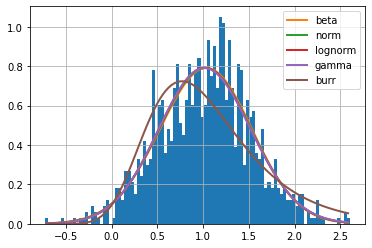

In [ ]:
data = np.random.normal(1, 0.5, 1000)
f = Fitter(data,
            distributions=['gamma',
                            'lognorm',
                            "beta",
                            "burr",
                            "norm"])
f.fit()
f.summary()

In [ ]:
for i in range(col):
  l = []
  for j in range(row):
    if np_v2[j][i] != np.nan:
      l.append(np_v2[j][i])
  print(l)
  try:
    f = Fitter(l,
            distributions=['gamma',
                            'lognorm',
                            "beta",
                            "burr",
                            "norm"])
    f.fit()
    f.summary()
    dist = f.get_best(method = 'sumsquare_error')
    print(dist)
    mean = dist[0][0]
    stdev = dist[0][1]
    data = np.random.normal(mean, stdev, 5)
    ind = random.sample(range(1, col), 5)
    for idx in range(len(ind)):
      np_v2[i][ind[idx]] = data[idx]
  except:
    count+=1
    pass

In [ ]:
for i in range(col):
  l = []
  for j in range(row):
    if np_v2[j][i] != np.nan:
      l.append(np_v2[j][i])
  print(l)
  data = random.sample(l, 5)
  ind = random.sample(range(1, col), 5)
  for idx in range(len(ind)):
    np_v2[ind[idx]][i] = data[idx]

In [ ]:
indx = random.sample(range(0, row), 7)
indy = random.sample(range(0, col), 7)
for i in range(len(indx)):
  s = random.sample(range(0, 1), 1)
  r = random.uniform(0,0.3)
  if s==0:
    np_v2_2[indx[i]][indy[i]] = r + np_v2_2[indx[i]][indy[i]]
  else:
    np_v2_2[indx[i]][indy[i]] = r - np_v2_2[indx[i]][indy[i]]

for i in range(len(indx)):
  s = random.sample(range(0, 1), 1)
  r = random.uniform(0,0.3)
  if s==0:
    np_v2_2[indy[i]] [indx[i]] = r + np_v2_2[indy[i]][indx[i]]
  else:
    np_v2_2[indy[i]] [indx[i]] = r - np_v2_2[indy[i]][indx[i]]